In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')
from tqdm import tqdm

In [73]:
df = pd.read_csv('./Salary_Data.csv')

In [74]:
df_max = df.abs().max()
df_max

YearsExperience        10.5
Salary             122391.0
dtype: float64

In [75]:
df = df / df_max

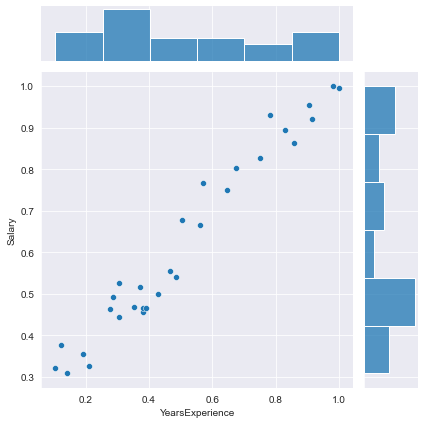

In [76]:
sns.jointplot(x = 'YearsExperience', y = 'Salary', data = df)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    df['YearsExperience'], 
    df['Salary'], 
    test_size=0.25,
    random_state=42
)

In [38]:
print(f'Shape of X_train is := {X_train.shape}')
print(f'Shape of X_test  is := {X_test.shape}')
print(f'Shape of y_train is := {y_train.shape}')
print(f'Shape of y_test  is := {y_test.shape}')

Shape of X_train is := (22,)
Shape of X_test  is := (8,)
Shape of y_train is := (22,)
Shape of y_test  is := (8,)


In [39]:
def hypothesis(theta0, theta1, X):
    return theta0 + (theta1 * X)

In [40]:
def cost_function(theta0, theta1, X, y):
    m = X.shape[0]
    return (1 / (2 * m)) * np.sum(np.power((hypothesis(theta0, theta1, X) - y) , 2))

In [41]:
def derivative_theta0(theta0, theta1, X, y):
    m = X.shape[0]
    val = (1 / m) * np.sum(hypothesis(theta0, theta1, X) - y)
    return val

def derivative_theta1(theta0, theta1, X, y):
    m = X.shape[0]
    val = (1 / m) * np.sum((hypothesis(theta0, theta1, X) - y) * X)
    return val

In [65]:
def train_model(theta0, theta1, learning_rate, epoch, X_train, y_train, X_test, y_test):
    history = { 'train_loss' : [], 'test_loss'  : [] }
    train_loss = None
    test_loss  = None
    
    for i in tqdm(range(epoch)):
        temp0 = derivative_theta0(theta0, theta1, X_train, y_train)
        temp1 = derivative_theta1(theta0, theta1, X_train, y_train)
        
        theta0 = theta0 - (learning_rate * temp0)
        theta1 = theta1 - (learning_rate * temp1)
        
        train_loss = cost_function(theta0, theta1, X_train, y_train)
        test_loss  = cost_function(theta0, theta1, X_test, y_test)
        
        history['train_loss'].append(train_loss)
        history['test_loss'].append(test_loss)
    
    history['epoch'] = epoch
    history['learning_rate'] = learning_rate
    history['final_training_loss'] = train_loss
    history['final_testing_loss']  = test_loss
    history['theta0'] = theta0
    history['theta1'] = theta1
        
    return history

100%|█████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 208.22it/s]


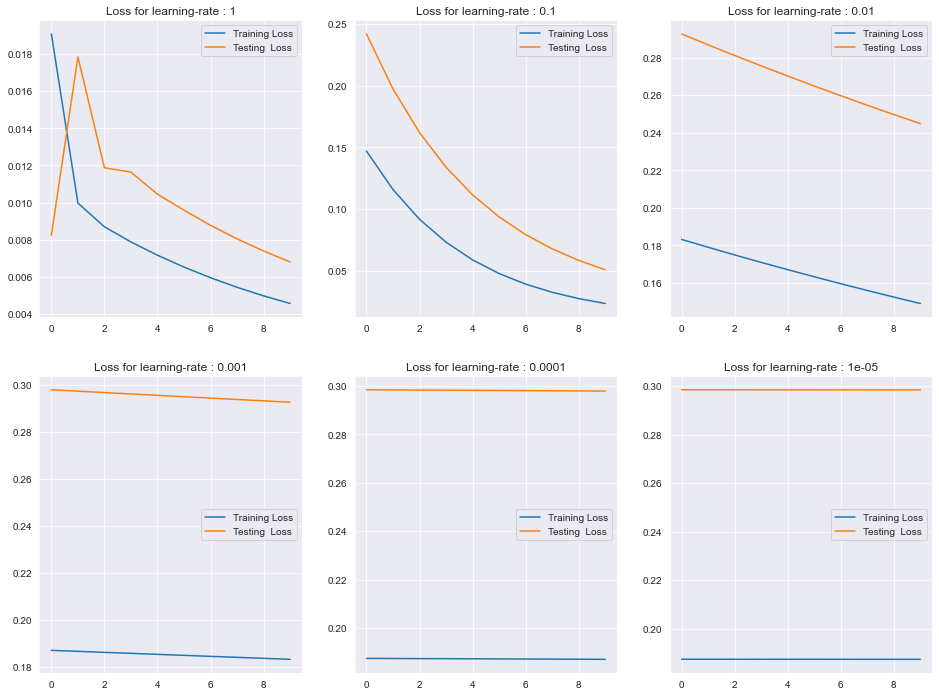

In [67]:
lr = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
f, ax = plt.subplots(2, 3, figsize = (16, 12))

for i in range(6):
    r, c = i // 3, i % 3
    
    history = train_model(0, 0, lr[i], 10, X_train, y_train, X_test, y_test)

    ax[r,c].plot(range(history['epoch']),history['train_loss'], label = 'Training Loss')
    ax[r,c].plot(range(history['epoch']),history['test_loss'],  label = 'Testing  Loss')
    ax[r,c].set_title(f"Loss for learning-rate : {history['learning_rate']}")
    ax[r,c].legend()

100%|███████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 340.13it/s]


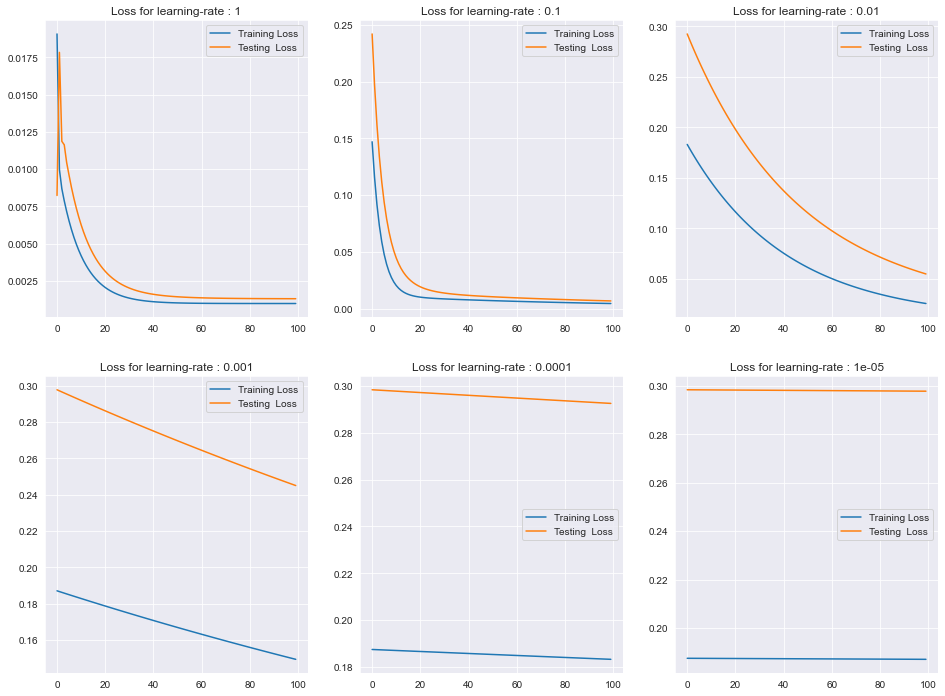

In [68]:
lr = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
f, ax = plt.subplots(2, 3, figsize = (16, 12))

for i in range(6):
    r, c = i // 3, i % 3
    
    history = train_model(0, 0, lr[i], 100, X_train, y_train, X_test, y_test)

    ax[r,c].plot(range(history['epoch']),history['train_loss'], label = 'Training Loss')
    ax[r,c].plot(range(history['epoch']),history['test_loss'],  label = 'Testing  Loss')
    ax[r,c].set_title(f"Loss for learning-rate : {history['learning_rate']}")
    ax[r,c].legend()

100%|█████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 375.57it/s]


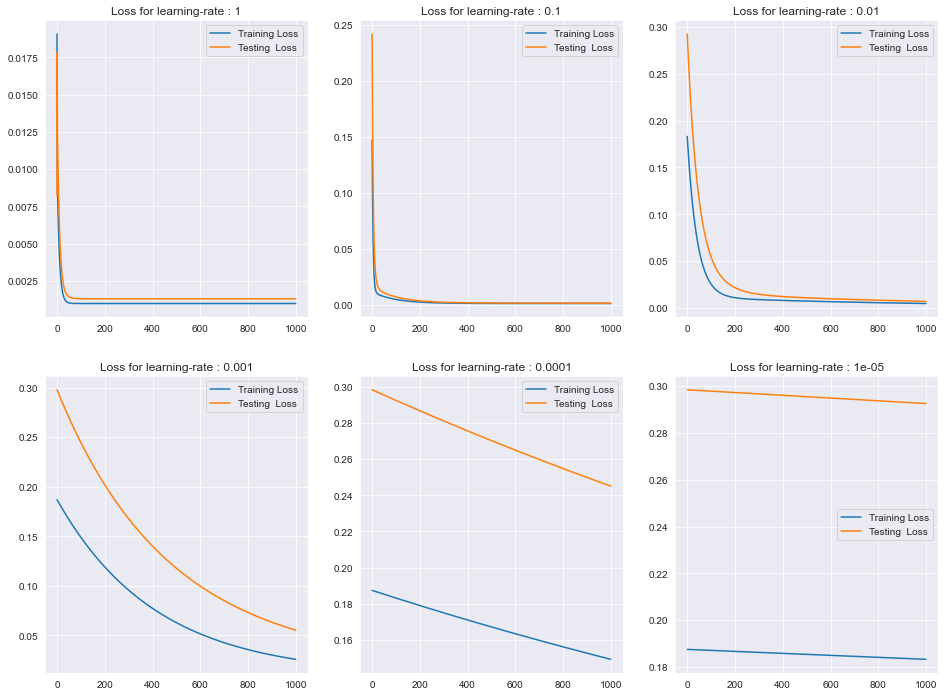

In [71]:
lr = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
f, ax = plt.subplots(2, 3, figsize = (16, 12))

for i in range(6):
    r, c = i // 3, i % 3
    
    history = train_model(0, 0, lr[i], 1000, X_train, y_train, X_test, y_test)

    ax[r,c].plot(range(history['epoch']),history['train_loss'], label = 'Training Loss')
    ax[r,c].plot(range(history['epoch']),history['test_loss'],  label = 'Testing  Loss')
    ax[r,c].set_title(f"Loss for learning-rate : {history['learning_rate']}")
    ax[r,c].legend()

100%|███████████████████████████████████████████████████████████████| 120/120 [00:00<00:00, 323.83it/s]


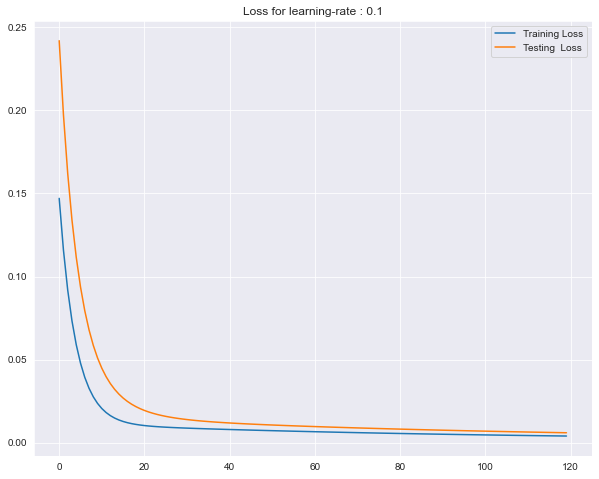

In [82]:
history = train_model(0, 0, 0.1, 120, X_train, y_train, X_test, y_test)

plt.figure(figsize = (10, 8))
plt.plot(range(history['epoch']),history['train_loss'], label = 'Training Loss')
plt.plot(range(history['epoch']),history['test_loss'],  label = 'Testing  Loss')
plt.title(f"Loss for learning-rate : {history['learning_rate']}")
plt.legend()

In [87]:
hypothesis(
    history['theta0'],
    history['theta1'],
    np.array([1, 5 , 10, 20]) / df_max['YearsExperience']
) * df_max['Salary']

array([ 49111.88056492,  72560.35761913, 101870.9539369 , 160492.14657242])